<a href="https://colab.research.google.com/github/kojomensahonums/GSOC24_ML4SCI/blob/master/DeepLense_Common_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

### Inspect data directories

In [ ]:
os.getcwd()
train_dir = r'/content/drive/Othercomputers/My laptop/GSOC_24/ML4SCI/Common_Test/Training'
os.listdir(os.path.join(train_dir, 'no'))

for image_class in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, image_class)):
        print(image)

In [ ]:
os.getcwd()
test_dir = r'/content/drive/Othercomputers/My laptop/GSOC_24/ML4SCI/Common_Test/Validation'
os.listdir(os.path.join(test_dir, 'no'))

for image_class in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, image_class)):
        print(image)

### Data Visualisation

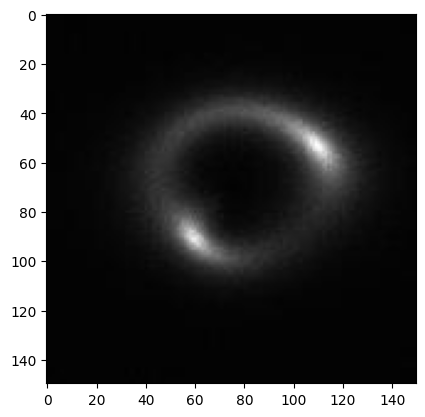

In [5]:
img =cv2.imread(os.path.join(train_dir, 'no', '1.jpg'))
img.shape
plt.imshow(img)

### Data Handling (Loading, Scaling, Augmentation)

In [6]:
# Loaded and inferred classes from directory architecture
data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size = (224, 224))
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size = (224,224))

Found 30000 files belonging to 3 classes.
Found 7500 files belonging to 3 classes.


In [7]:
# Train set
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape # image
len(batch)
batch[1] # labels:: 0--> no, 1 --> sphere, 2 --> vortex

array([2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [8]:
# Test Set
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()
test_batch[0].shape # image
len(test_batch)
test_batch[1] # labels:: 0--> no, 1 --> sphere, 2 --> vortex

array([0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 1], dtype=int32)

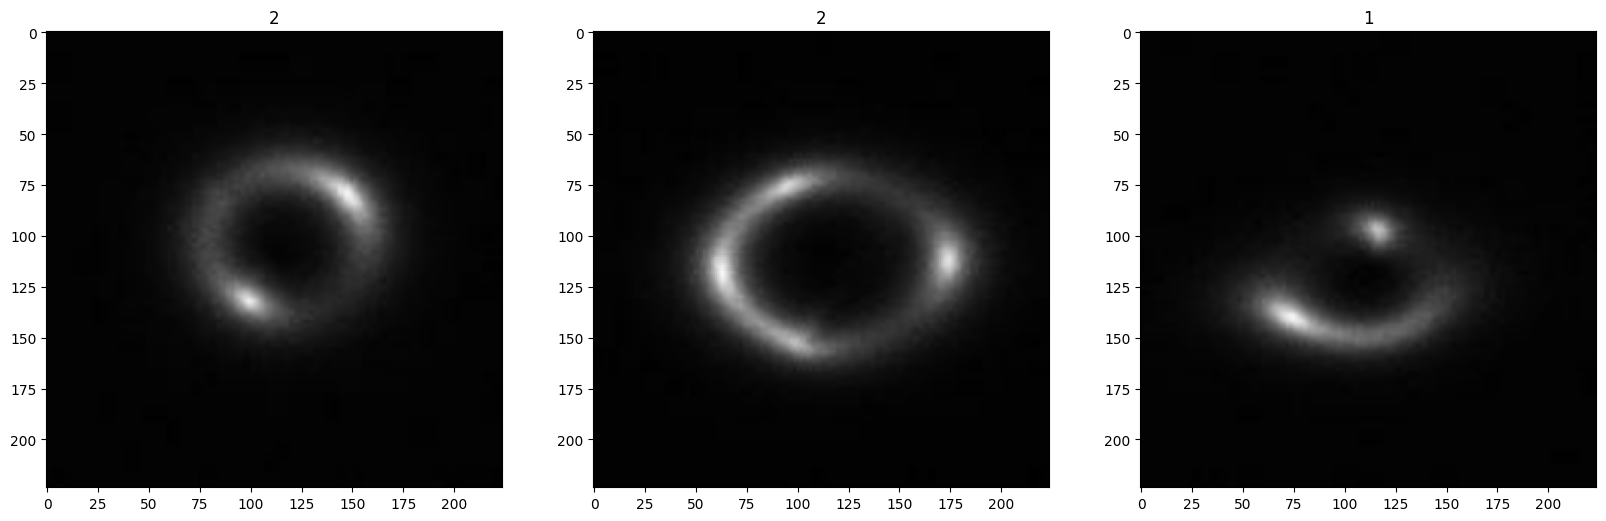

In [9]:
# Visualising Train set
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

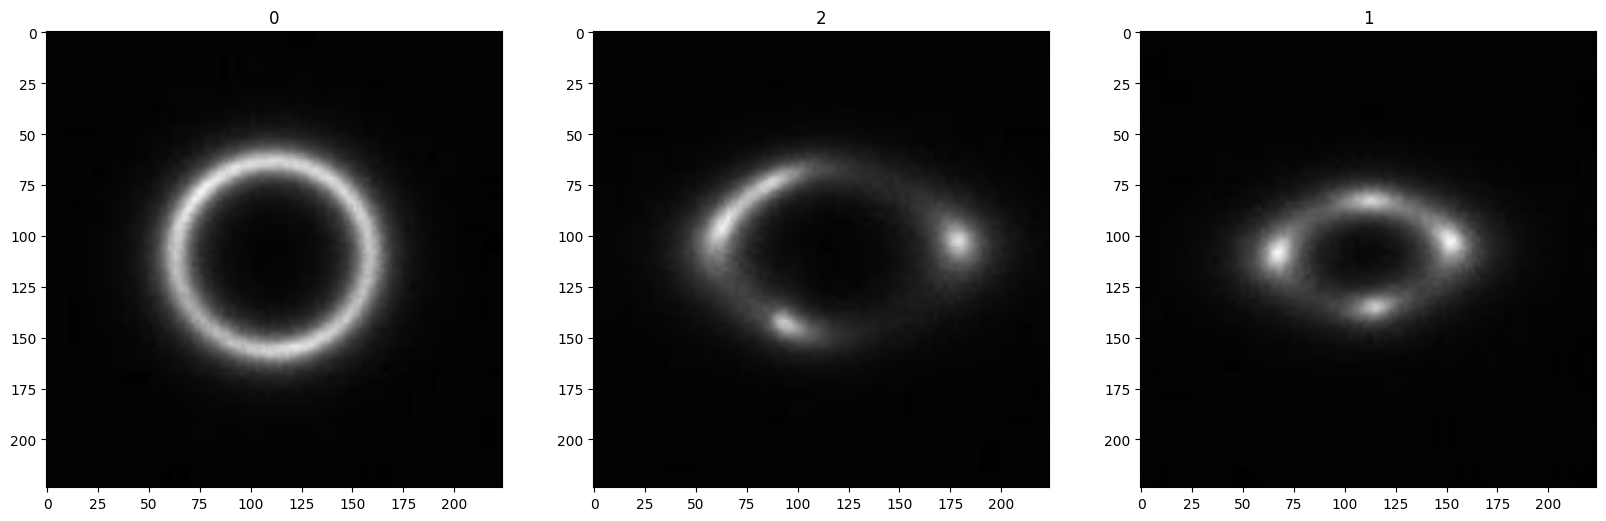

In [10]:
# Visualising Test Set
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

Preprocess Data

In [11]:
# One-hot encode the labels
num_classes = len(data.class_names)
num_classes

3

##### Scale data

In [12]:
# One-hot encode with scaling on Train set
# to enable categorical crossentropy usage
scaled_data = data.map(lambda x,y: (x/255,tf.one_hot(y, num_classes)))
scaled_iterator = scaled_data.as_numpy_iterator()
batch2 = scaled_iterator.next()
batch2[1] # Viewing a batch of data

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [13]:
# One-hot encode with scaling on Test Set
# to enable categorical crossentropy usage
scaled_test_data = test_data.map(lambda x,y: (x/255,tf.one_hot(y, num_classes)))
scaled_test_iterator = scaled_test_data.as_numpy_iterator()
test_batch2 = scaled_test_iterator.next()
test_batch2[1] # Viewing a batch of data

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In the one-hot encoding, the position of the 1 in the array indicates the class:

[1, 0, 0] corresponds to "no"
[0, 1, 0] corresponds to "sp"
[0, 0, 1] corresponds to "vo"


<!-- label_mapping = {
    0: "no",
    1: "sp",
    2: "vo"
} -->


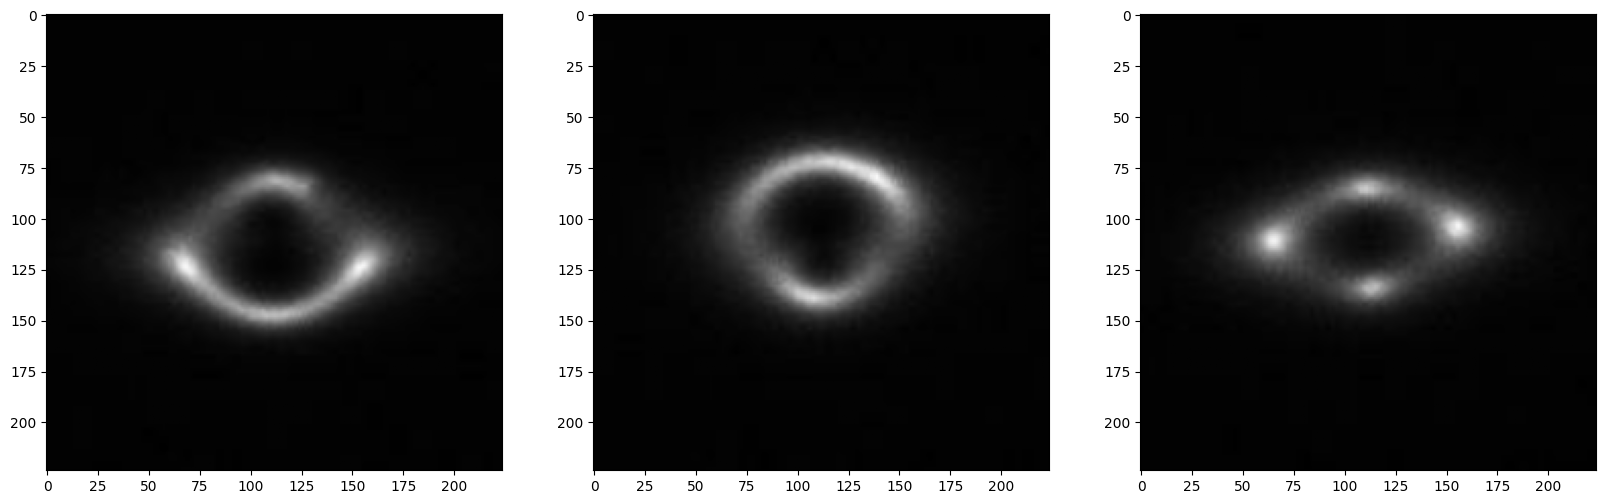

In [14]:
# Visualising Scaled Train & Test Set
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(test_batch2[0][:3]): # replace with batch2 for scaled train set
    ax[idx].imshow(img)

Data Augmentation

In [15]:
# datasets for use: training_set, validation_set, test_set
batch_size = 32

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Apply data augmentation to training data
train_data_augmented = scaled_data.map(lambda x, y: (data_augmentation(x, training=True), y))

# Calculate steps per epoch
steps_per_epoch = scaled_data.cardinality().numpy() // batch_size
steps_per_epoch

29

##### Split data

Assuming train and val sets made up 100% of the data, then, 100% of the train set plus 50% of the val set make up 90% of the entire data. The remaining portion of the val set will constitute 10% of the entire data, as test set.

In [16]:
# Split training data into 90:10 ratio
# Use entire traininng set for training, (50% of val for validation and 50% of val for test set )

val_size = int(len(test_data)*0.5)
test_size = int(len(test_data)*0.5)
train_size = int(len(data))
print(train_size, val_size, test_size, sep='\n')


938
117
117


In [17]:
# Defining train_test splits with skip_take methods
training_set = scaled_data.take(train_size)
validation_set = scaled_test_data.take(val_size)
test_set = scaled_test_data.skip(val_size).take(test_size)
print(training_set, validation_set, test_set, sep='\n')

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


#### Model Building

Building from scratch a VGG-16 model using its model architecture

In [20]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [21]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Define optimizer
opt = Adam(learning_rate=0.001)

model.compile(loss=tf.losses.CategoricalCrossentropy(), optimizer=opt, metrics=METRICS)
# Observe
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

### Train model

In [24]:
logdir = r"/content/drive/Othercomputers/My laptop/GSOC_24/ML4SCI/Common_Test/Logs"
tensorboard_callback = TensorBoard(log_dir=logdir)

checkpoint = ModelCheckpoint(r"/content/drive/Othercomputers/My laptop/GSOC_24/ML4SCI/Common_Test/Models/vgg16_darkmattersubstrate.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')#, period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
hist = model.fit(training_set, steps_per_epoch=10, validation_data= validation_set, validation_steps=10, epochs=100, callbacks=[checkpoint,early, tensorboard_callback])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.1230 - accuracy: 0.3219 - precision: 0.3492 - recall: 0.0688

10/10 [==============================] - 87s 7s/step - loss: 1.1230 - accuracy: 0.3219 - precision: 0.3492 - recall: 0.0688 - val_loss: 1.0982 - val_accuracy: 0.3438 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.0979 - accuracy: 0.3156 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 14s 1s/step - loss: 1.0979 - accuracy: 0.3156 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0967 - val_accuracy: 0.3500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.1003 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.1003 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0987 - val_accuracy: 0.3625 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 1.1004 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 43s 5s/step - loss: 1.1004 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0992 - val_accuracy: 0.3344 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
10/10 [==============================] - ETA: 0s - loss: 1.0973 - accuracy: 0.3812 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0973 - accuracy: 0.3812 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0988 - val_accuracy: 0.3375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/100
10/10 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3438 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 51s 5s/step - loss: 1.0986 - accuracy: 0.3438 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0971 - val_accuracy: 0.3656 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/100
10/10 [==============================] - ETA: 0s - loss: 1.1002 - accuracy: 0.3156 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 49s 5s/step - loss: 1.1002 - accuracy: 0.3156 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0986 - val_accuracy: 0.3406 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 8/100
10/10 [==============================] - ETA: 0s - loss: 1.0993 - accuracy: 0.3250 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0993 - accuracy: 0.3250 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0985 - val_accuracy: 0.3500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/100
10/10 [==============================] - ETA: 0s - loss: 1.0985 - accuracy: 0.3562 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 47s 5s/step - loss: 1.0985 - accuracy: 0.3562 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0982 - val_accuracy: 0.3531 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 10/100
10/10 [==============================] - ETA: 0s - loss: 1.0972 - accuracy: 0.3875 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0972 - accuracy: 0.3875 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0981 - val_accuracy: 0.3531 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 11/100
10/10 [==============================] - ETA: 0s - loss: 1.0970 - accuracy: 0.3688 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 44s 5s/step - loss: 1.0970 - accuracy: 0.3688 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0984 - val_accuracy: 0.3469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 12/100
10/10 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.3375 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 46s 5s/step - loss: 1.0992 - accuracy: 0.3375 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0980 - val_accuracy: 0.3500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 13/100
10/10 [==============================] - ETA: 0s - loss: 1.0985 - accuracy: 0.3406 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 47s 5s/step - loss: 1.0985 - accuracy: 0.3406 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0995 - val_accuracy: 0.3438 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 14/100
10/10 [==============================] - ETA: 0s - loss: 1.0998 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0998 - accuracy: 0.3281 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0994 - val_accuracy: 0.3281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 15/100
10/10 [==============================] - ETA: 0s - loss: 1.0967 - accuracy: 0.3562 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0967 - accuracy: 0.3562 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0981 - val_accuracy: 0.3438 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 16/100
10/10 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.3250 - precision: 0.0000e+00 - recall: 0.0000e+00

10/10 [==============================] - 45s 5s/step - loss: 1.0995 - accuracy: 0.3250 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0975 - val_accuracy: 0.3656 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 16: early stopping


### Save model

In [25]:
from tensorflow.keras.models import load_model

model.save(os.path.join(r"/content/drive/Othercomputers/My laptop/GSOC_24/ML4SCI/Common_Test/Models", 'vgg16_darkmattersubstrate.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Plot of Metric Performances against Validation Set

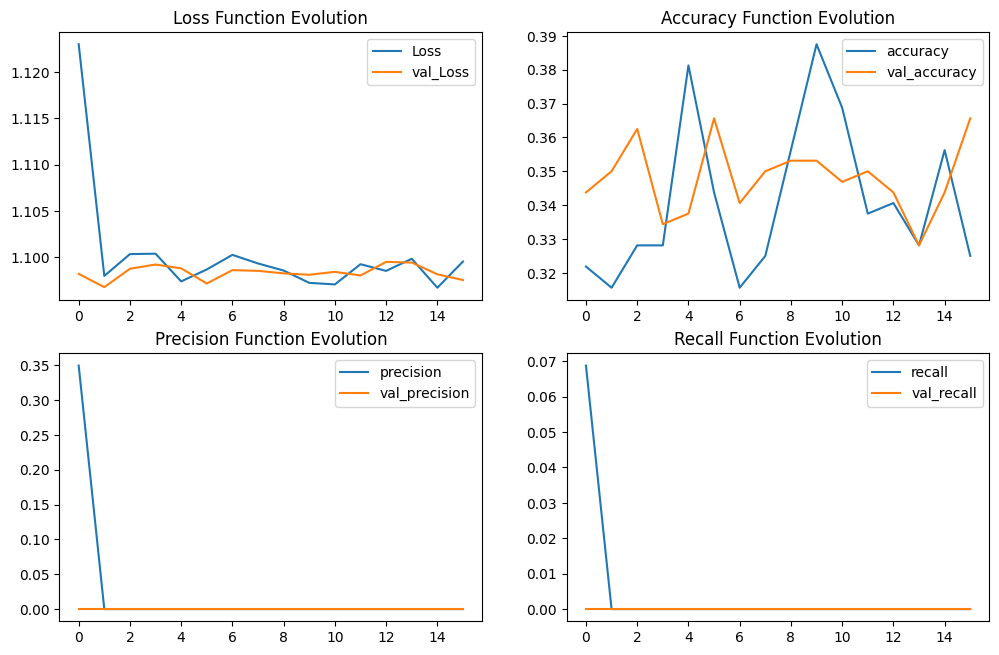

In [27]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(hist.history['precision'], label='precision')
plt.plot(hist.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(hist.history['recall'], label='recall')
plt.plot(hist.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

### Evaluate Performance against Test Set

117/117 [==============================] - 1370s 6s/step


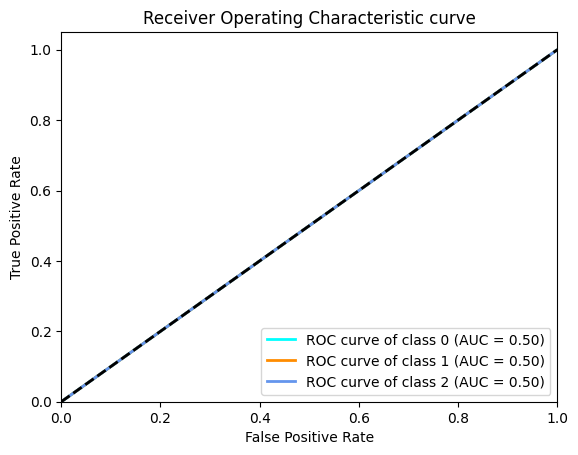

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have a trained model called 'model' and a test dataset 'test_data'
# Get the predicted probabilities for each class
y_pred_prob = model.predict(test_set)

# Binarize the labels
y_true = np.concatenate([y for x, y in test_set], axis=0)
n_classes = y_true.shape[1] if len(y_true.shape) > 1 else 1
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()
